Ivanna Herrera Ibarra 744614                                                                                            
10/09/23
# Tarea 5 - Ajuste de curvas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [2]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

Text(0, 0.5, 'Costos')

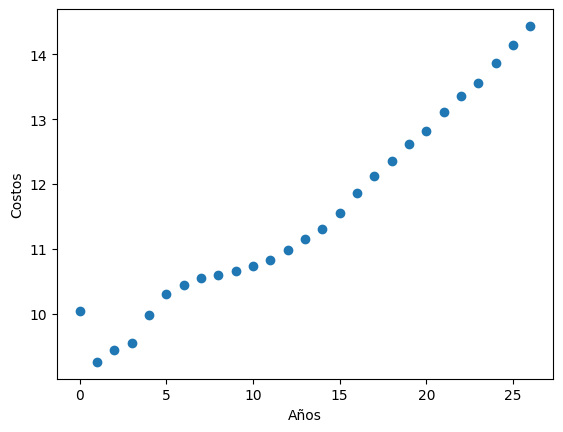

In [6]:
m = len(data)
x = np.linspace(0, 26, m)
y = data

plt.figure()
plt.scatter(x, y)
plt.xlabel('Años')
plt.ylabel('Costos')

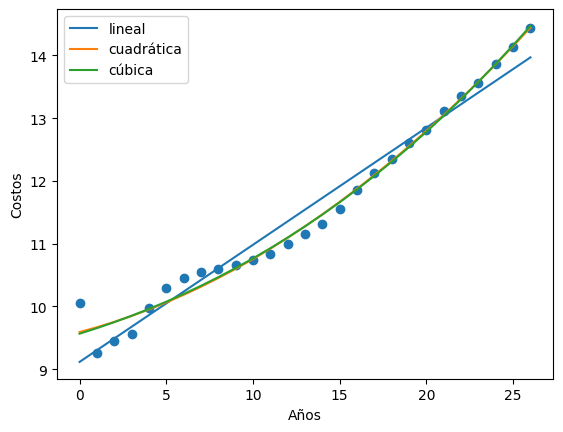

In [7]:
def funcion_de_costo(beta, X, y):
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

#lineal = b0 + b1*x
beta = np.random.rand(2)
ones = np.ones([m, 1])
x_factor = np.reshape(x, [m, 1])
X = np.hstack( (ones, x_factor) )
y_vector = np.reshape(data, [m, 1])
sol1 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

#cuadrática = b0 + b1*x + b2*x**2
beta = np.random.rand(3)
x2_factor = np.reshape(x**2, [m, 1])
X2 = np.hstack( (ones, x_factor, x2_factor) )
sol2 = opt.minimize(funcion_de_costo, beta, args=(X2, y_vector))

#cúbica = b0 + b1*x + b2*x**2 + b3*x**3
beta = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack( (ones, x_factor, x2_factor, x3_factor) )
sol3 = opt.minimize(funcion_de_costo, beta, args=(X3, y_vector))

def f1(x):
    return sol1.x[0] + sol1.x[1]*x

def f2(x):
    return sol2.x[0] + sol2.x[1]*x + sol2.x[2]*x**2

def f3(x):
    return sol3.x[0] + sol3.x[1]*x + sol3.x[2]*x**2 + sol3.x[3]*x**3

plt.figure()
plt.scatter(x, y)
plt.plot(x, f1(x), label = "lineal")
plt.plot(x, f2(x), label = "cuadrática")
plt.plot(x, f3(x), label = "cúbica")
plt.xlabel('Años')
plt.ylabel('Costos')
plt.legend(loc = "best")

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [295]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/Colab Notebooks/'
data = pd.read_csv(data_path + "population_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [296]:
data

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


Text(0, 0.5, 'Población')

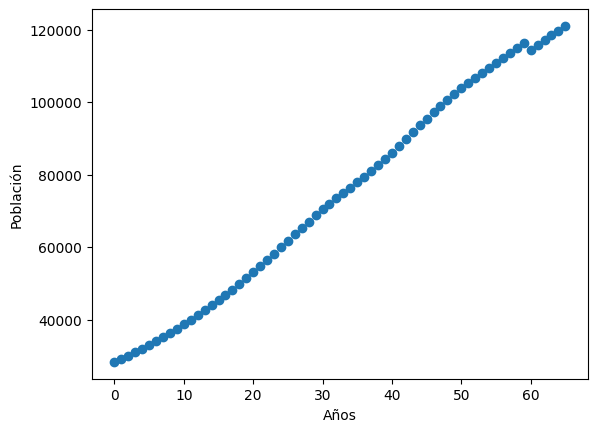

In [297]:
m = len(data)
x = np.linspace(0, 65, m)
y = data["Poblacion"]

plt.figure()
plt.scatter(x, y)
plt.xlabel('Años')
plt.ylabel('Población')

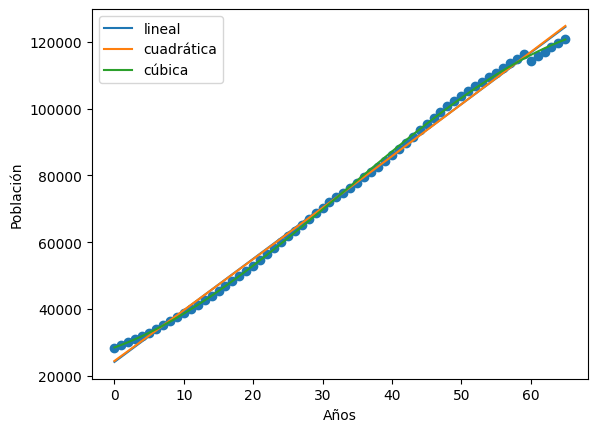

In [298]:
data_array = data["Poblacion"].to_numpy()

def funcion_de_costo(beta, X, y):
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

#lineal = b0 + b1*x
beta = np.random.rand(2)
ones = np.ones([m, 1])
x_factor = np.reshape(x, [m, 1])
X = np.hstack( (ones, x_factor) )
y_vector = np.reshape(data_array, [m, 1])
sol1 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

#cuadrática = b0 + b1*x + b2*x**2
beta = np.random.rand(3)
x2_factor = np.reshape(x**2, [m, 1])
X2 = np.hstack( (ones, x_factor, x2_factor) )
sol2 = opt.minimize(funcion_de_costo, beta, args=(X2, y_vector))

#cúbica = b0 + b1*x + b2*x**2 + b3*x**3
beta = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack( (ones, x_factor, x2_factor, x3_factor) )
sol3 = opt.minimize(funcion_de_costo, beta, args=(X3, y_vector))

def f1(x):
    return sol1.x[0] + sol1.x[1]*x

def f2(x):
    return sol2.x[0] + sol2.x[1]*x + sol2.x[2]*x**2

def f3(x):
    return sol3.x[0] + sol3.x[1]*x + sol3.x[2]*x**2 + sol3.x[3]*x**3

plt.figure()
plt.scatter(x, y)
plt.plot(x, f1(x), label = "lineal")
plt.plot(x, f2(x), label = "cuadrática")
plt.plot(x, f3(x), label = "cúbica")
plt.xlabel('Años')
plt.ylabel('Población')
plt.legend(loc = "best")

<BarContainer object of 3 artists>

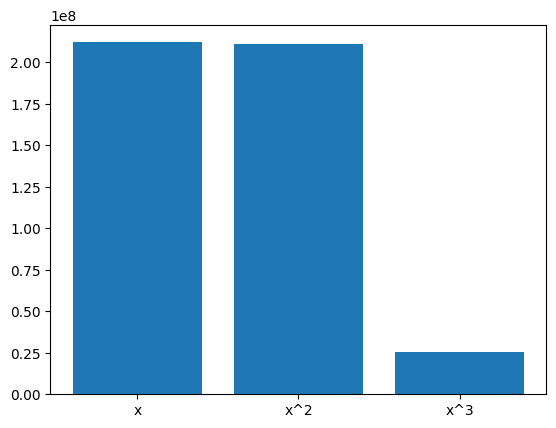

In [299]:
x = [1, 2, 3]
y = [sol1.fun, sol2.fun, sol3.fun]
etiquetas = ["x", "x^2", "x^3"]

fig, ax = plt.subplots()
ax.bar(x = x, height = y, tick_label = etiquetas)

In [300]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/Colab Notebooks/'
data = pd.read_csv(data_path + "population_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [301]:
data

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


Text(0, 0.5, 'Nacimientos')

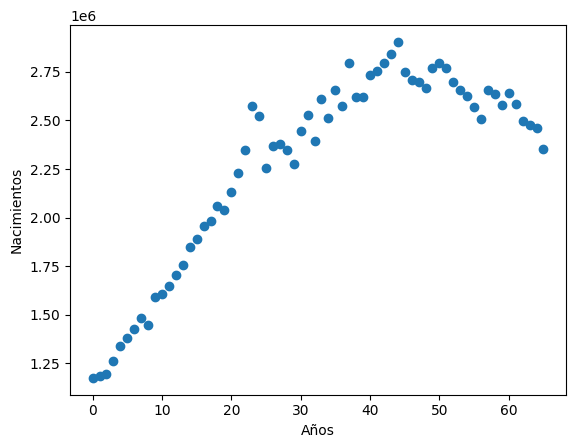

In [302]:
m = len(data)
x = np.linspace(0, 65, m)
y = data["Nacimientos"]

plt.figure()
plt.scatter(x, y)
plt.xlabel('Años')
plt.ylabel('Nacimientos')

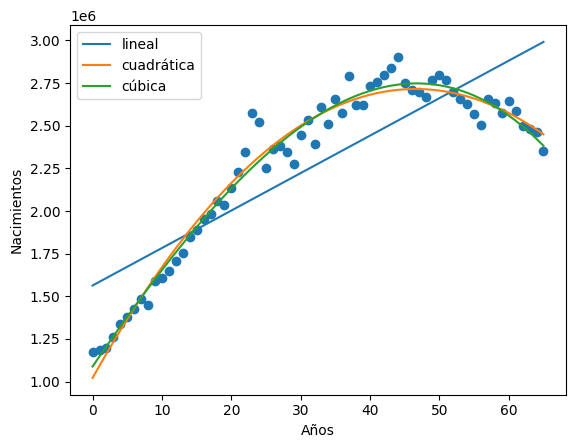

In [303]:
data_array = data["Nacimientos"].to_numpy()

def funcion_de_costo(beta, X, y):
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

#lineal = b0 + b1*x
beta = np.random.rand(2)
ones = np.ones([m, 1])
x_factor = np.reshape(x, [m, 1])
X = np.hstack( (ones, x_factor) )
y_vector = np.reshape(data_array, [m, 1])
sol1 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

#cuadrática = b0 + b1*x + b2*x**2
beta = np.random.rand(3)
x2_factor = np.reshape(x**2, [m, 1])
X2 = np.hstack( (ones, x_factor, x2_factor) )
sol2 = opt.minimize(funcion_de_costo, beta, args=(X2, y_vector))

#cúbica = b0 + b1*x + b2*x**2 + b3*x**3
beta = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack( (ones, x_factor, x2_factor, x3_factor) )
sol3 = opt.minimize(funcion_de_costo, beta, args=(X3, y_vector))

def f1(x):
    return sol1.x[0] + sol1.x[1]*x

def f2(x):
    return sol2.x[0] + sol2.x[1]*x + sol2.x[2]*x**2

def f3(x):
    return sol3.x[0] + sol3.x[1]*x + sol3.x[2]*x**2 + sol3.x[3]*x**3

plt.figure()
plt.scatter(x, y)
plt.plot(x, f1(x), label = "lineal")
plt.plot(x, f2(x), label = "cuadrática")
plt.plot(x, f3(x), label = "cúbica")
plt.xlabel('Años')
plt.ylabel('Nacimientos')
plt.legend(loc = "best")

<BarContainer object of 3 artists>

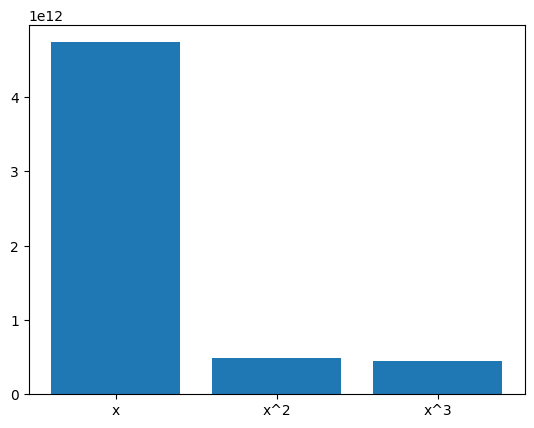

In [304]:
x = [1, 2, 3]
y = [sol1.fun, sol2.fun, sol3.fun]
etiquetas = ["x", "x^2", "x^3"]

fig, ax = plt.subplots()
ax.bar(x = x, height = y, tick_label = etiquetas)